# Meeting Notes

In [39]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
alt.data_transformers.disable_max_rows() # allow large data

DataTransformerRegistry.enable('default')

In [27]:
analytics = pd.read_csv('outputs/manual_ann_models_performance.csv')
analytics.T

,0,1,2,3,4,5,6,7,8,9
model_name,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10
hp_layers,4,8,16,3,6,9,5,10,15,2
hp_units,128,32,8,32,128,32,8,128,2,2
hp_activation,relu,relu,relu,sigmoid,sigmoid,sigmoid,tanh,tanh,tanh,sigmoid
hp_optimizer,adam,sgd,rmsprop,adam,sgd,rmsprop,adam,sgd,rmsprop,sgd
hp_loss,binary_crossentropy,cosine_similarity,binary_crossentropy,cosine_similarity,cosine_similarity,binary_crossentropy,binary_focal_crossentropy,binary_focal_crossentropy,binary_focal_crossentropy,binary_crossentropy
hp_epochs,3,4,6,7,8,9,10,11,12,5
hp_batch_size,16,32,64,16,32,64,16,32,64,32
obj_training_time,4.273168,2.189607,5.369048,4.953011,3.182271,5.332398,5.200971,4.163914,5.701545,2.484479
obj_total_layers,5,9,17,4,7,10,6,11,16,3


In [28]:
analytics.columns

Index(['model_name', 'hp_layers', 'hp_units', 'hp_activation', 'hp_optimizer',
       'hp_loss', 'hp_epochs', 'hp_batch_size', 'obj_training_time',
       'obj_total_layers', 'obj_total_nodes', 'obj_loss', 'obj_accuracy',
       'obj_binary_accuracy', 'obj_cosine_similarity', 'obj_true_positives',
       'obj_true_negatives', 'obj_false_positives', 'obj_false_negatives',
       'obj_mean_squared_error', 'obj_recall', 'obj_precision', 'obj_auc',
       'obj_sensitivity', 'obj_specificity'],
      dtype='object')

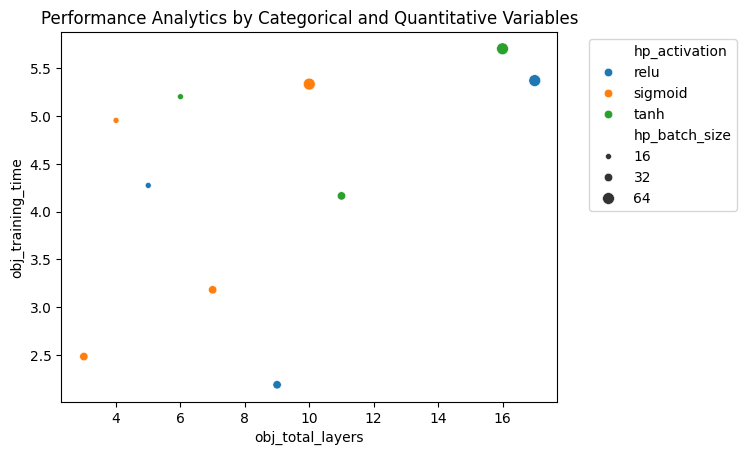

In [40]:
sns.scatterplot(
    data=analytics, 
    x='obj_total_layers', 
    y='obj_training_time',
    hue='hp_activation', 
    size='hp_batch_size'    
)

plt.title('Performance Analytics by Categorical and Quantitative Variables')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [31]:
alt.Chart(data=analytics,).mark_point().encode(
    x = alt.X('obj_binary_accuracy:Q'),
    y = alt.Y('obj_training_time:Q'),
    color = alt.Color('hp_loss:N'),
    size = alt.Size('obj_total_nodes:Q'),
    tooltip = ['hp_activation:N', 'hp_optimizer:N', 'hp_loss:N', 'obj_training_time:Q'],
).properties(
    height=500, width = 1000, title= 'Relationships Between Objectives'
).configure_axis(
    grid=True
).configure_title(
    fontSize=20,
    font='Imprima',
    #color='#785EF0'
)

alt.Chart(...)